In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
fiba_raw = pd.read_json('big.json', orient='columns', encoding = 'utf8')

In [9]:
fiba_raw['players'][0]

{'PlayerId': 152139,
 'PlayerLink': '/basketballworldcup/2019/player/Joe-Ingles',
 'ShirtNumber': 'N/A',
 'Position': 'Small Forward',
 'OfficialName': 'Joe Ingles (AUS)',
 'LastName': 'Ingles',
 'GamesPlayedTotal': 8,
 'MinutesTotal': 271,
 'SecondsTotal': 16261,
 'PointsTotal': 84,
 'FieldGoals2PointsMadeTotal': 20,
 'FieldGoals2PointsAttemptedTotal': 30,
 'FieldGoals3PointsMadeTotal': 10,
 'FieldGoals3PointsAttemptedTotal': 38,
 'FreeThrowsMadeTotal': 14,
 'FreeThrowsAttemptedTotal': 16,
 'OffensiveReboundsTotal': 1,
 'DefensiveReboundsTotal': 48,
 'BlocksTotal': 3,
 'AssistsTotal': 45,
 'TurnOversTotal': 24,
 'StealsTotal': 13,
 'PersonalFoulsTotal': 18,
 'Efficiency': 130.0,
 'PlusMinus': 39,
 'DoubleDoubles': 1,
 'TripleDoubles': 0}

In [10]:
def transform_dict(player):
    cardict = {}
    for feature in ['brand','make']:
        cardict[feature] = car[feature]
    
    try:
        
        cardict['price'] = float(car['price'].split(' ')[0].replace('.',''))
        
    except ValueError:
         cardict['price'] = ''
   
    for item in car['basic']:
        if u'godište' in item:
            cardict['year'] = int(item.split('.')[0])
        if u'cm3' in item:
            cardict['cm3'] = int(item.split(' ')[0])
        if u'km' in item:
            cardict['km'] = float(item.split(' ')[0].replace('.',''))
        if u'KW' in item:
            cardict['KW'] = str(item.split(' ')[0])
        if ('Dizel' in item):
            cardict['fuel'] = 'Diesel'
        if ('Gas (TNG)' in item) and ('benzin' in str(item).lower()):
            cardict['fuel'] = 'LPG/Gasoline'
        if ('Gas (TNG)' not in item) and ('benzin' in str(item).lower()):
            cardict['fuel'] = 'Gasoline'
        if ('Metan CNG' in item):
            cardict['fuel'] = 'Methane'
            
    for item in car['adv']:
        
        if u'Menjač' in item:            
            cardict['gearbox'] = str(item.split(' ')[1])
        if u'Broj vrata' in item:            
            cardict['doors'] = str(item.split(' ')[-1])
        if u'Kategorija' in item:            
            cardict['category'] = str(item.split(' ')[1])
            
            
        if u'Nije registrovan' in item:            
            cardict['registered'] = 0
            
        if u'Registrovano' in item:
            cardict['registered'] = 1
        
        if u'Havarisano Ne' in item:
            cardict['damage'] = 0
        
        if u'Havarisano Da' in item:
            cardict['damage'] = 1
            
               
    
    return cardict

In [11]:
type(fiba_raw['players'])

pandas.core.series.Series

In [13]:
players = pd.DataFrame(list(fiba_raw['players']))

In [14]:
players.head(5)

,AssistsTotal,BlocksTotal,DefensiveReboundsTotal,DoubleDoubles,Efficiency,FieldGoals2PointsAttemptedTotal,FieldGoals2PointsMadeTotal,FieldGoals3PointsAttemptedTotal,FieldGoals3PointsMadeTotal,FreeThrowsAttemptedTotal,...,PlayerId,PlayerLink,PlusMinus,PointsTotal,Position,SecondsTotal,ShirtNumber,StealsTotal,TripleDoubles,TurnOversTotal
0,45,3,48,1,130.0,30,20,38,10,16,...,152139,/basketballworldcup/2019/player/Joe-Ingles,39,84,Small Forward,16261,N/A,13,0,24
1,50,0,25,0,91.0,30,9,39,14,15,...,173478,/basketballworldcup/2019/player/Matthew-Dellav...,48,71,Guard,14670,N/A,5,0,20
2,31,2,11,0,144.0,66,38,57,23,43,...,156215,/basketballworldcup/2019/player/Patty-Mills,57,182,Guard,16272,N/A,7,0,28
3,14,4,32,1,119.0,41,24,21,11,11,...,151328,/basketballworldcup/2019/player/Aron-Baynes,35,91,Forward,10210,N/A,3,0,9
4,19,6,36,0,106.0,47,31,2,0,6,...,143395,/basketballworldcup/2019/player/Andrew-Bogut,10,64,Center,8582,N/A,4,0,13


In [15]:
players.columns

Index(['AssistsTotal', 'BlocksTotal', 'DefensiveReboundsTotal',
       'DoubleDoubles', 'Efficiency', 'FieldGoals2PointsAttemptedTotal',
       'FieldGoals2PointsMadeTotal', 'FieldGoals3PointsAttemptedTotal',
       'FieldGoals3PointsMadeTotal', 'FreeThrowsAttemptedTotal',
       'FreeThrowsMadeTotal', 'GamesPlayedTotal', 'LastName', 'MinutesTotal',
       'OffensiveReboundsTotal', 'OfficialName', 'PersonalFoulsTotal',
       'PlayerId', 'PlayerLink', 'PlusMinus', 'PointsTotal', 'Position',
       'SecondsTotal', 'ShirtNumber', 'StealsTotal', 'TripleDoubles',
       'TurnOversTotal'],
      dtype='object')

In [16]:
players.OfficialName.head(5)

0             Joe Ingles (AUS)
1    Matthew Dellavedova (AUS)
2            Patty Mills (AUS)
3            Aron Baynes (AUS)
4           Andrew Bogut (AUS)
Name: OfficialName, dtype: object

In [19]:
def get_country(item):
    return item.split('(')[1].split(')')[0]

In [20]:
get_country('Je Ingles (AUS)')

'AUS'

In [23]:
players['Country'] = players['OfficialName'].apply(get_country)

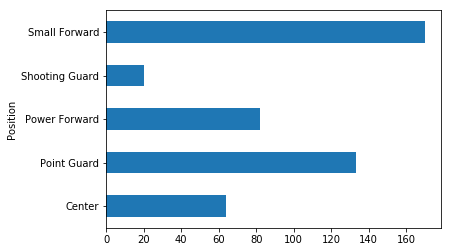

In [37]:
players[players['Country']=='GRE'].groupby(['Position']).sum()['Efficiency'].plot.barh()

In [42]:
serbia = players[players['Country']=='SRB']

In [43]:
serbia.head()

,AssistsTotal,BlocksTotal,DefensiveReboundsTotal,DoubleDoubles,Efficiency,FieldGoals2PointsAttemptedTotal,FieldGoals2PointsMadeTotal,FieldGoals3PointsAttemptedTotal,FieldGoals3PointsMadeTotal,FreeThrowsAttemptedTotal,...,PlayerLink,PlusMinus,PointsTotal,Position,SecondsTotal,ShirtNumber,StealsTotal,TripleDoubles,TurnOversTotal,Country
20,43,2,24,0,98.0,27,17,22,7,2,...,/basketballworldcup/2019/player/Stefan-Jovic,133,56,Point Guard,11981,N/A,8,0,16,SRB
21,26,0,12,0,57.0,22,13,15,3,10,...,/basketballworldcup/2019/player/Vasilije-Micic,29,45,Point Guard,8984,N/A,7,0,14,SRB
22,35,2,25,1,197.0,42,25,66,35,35,...,/basketballworldcup/2019/player/Bogdan-Bogdanovic,100,183,Shooting Guard,13441,N/A,10,0,11,SRB
23,8,1,6,0,35.0,9,5,20,7,10,...,/basketballworldcup/2019/player/Marko-Guduric,35,39,Shooting Guard,6279,N/A,5,0,7,SRB
24,7,2,17,0,73.0,20,12,14,4,24,...,/basketballworldcup/2019/player/Vladimir-Lucic,66,57,Forward,10418,N/A,6,0,2,SRB


In [44]:
serbia.columns

Index(['AssistsTotal', 'BlocksTotal', 'DefensiveReboundsTotal',
       'DoubleDoubles', 'Efficiency', 'FieldGoals2PointsAttemptedTotal',
       'FieldGoals2PointsMadeTotal', 'FieldGoals3PointsAttemptedTotal',
       'FieldGoals3PointsMadeTotal', 'FreeThrowsAttemptedTotal',
       'FreeThrowsMadeTotal', 'GamesPlayedTotal', 'LastName', 'MinutesTotal',
       'OffensiveReboundsTotal', 'OfficialName', 'PersonalFoulsTotal',
       'PlayerId', 'PlayerLink', 'PlusMinus', 'PointsTotal', 'Position',
       'SecondsTotal', 'ShirtNumber', 'StealsTotal', 'TripleDoubles',
       'TurnOversTotal', 'Country'],
      dtype='object')

In [46]:
serbia['OfficialName']

20          Stefan Jovic (SRB)
21        Vasilije Micic (SRB)
22     Bogdan Bogdanovic (SRB)
23         Marko Guduric (SRB)
24        Vladimir Lucic (SRB)
25       Marko Simonovic (SRB)
26       Nemanja Bjelica (SRB)
27       Stefan Bircevic (SRB)
28          Nikola Jokic (SRB)
29    Miroslav Raduljica (SRB)
30      Nikola Milutinov (SRB)
31      Boban Marjanovic (SRB)
Name: OfficialName, dtype: object

In [56]:
def get_full_name(item):
    return str(item.split('(')[0]).rstrip()

In [57]:
players['FullName'] = players['OfficialName'].apply(get_full_name)

In [58]:
players['FullName'].sample(5)

2           Patty Mills
85          Rudy Gobert
309    Facundo Campazzo
270      Windi Graterol
225          Omar Abada
Name: FullName, dtype: object

In [59]:
players.to_csv("fiba_stats.csv")

In [65]:
# argentina def rebs should be 27.6
arg_def_reb = players[players['Country']=='ARG']['Efficiency'].sum()
print(arg_def_reb)

788.0


### Querying by countries
1. All countries rebounds, offensive and defensive, stacked
2. All countries points 
3. Efficiency
4. Steals
5. Turnovers
6. Assists

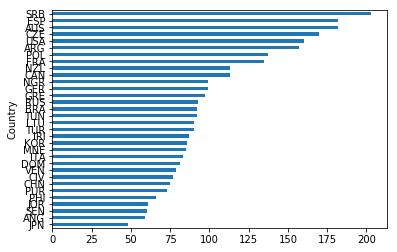

In [92]:
# rebounds
assists_by_country = players.groupby(['Country'])['AssistsTotal'].sum()
assists_by_country.sort_values(ascending=True).plot.barh()

In [94]:
assists_by_country.sort_values(ascending=False)

Country
SRB    203
ESP    182
AUS    182
CZE    170
USA    160
ARG    157
POL    137
FRA    135
NZL    113
CAN    113
NGR     99
GER     99
GRE     97
RUS     93
BRA     92
TUN     92
LTU     90
TUR     90
IRI     87
KOR     86
MNE     85
ITA     83
DOM     81
VEN     79
CIV     77
CHN     75
PUR     73
PHI     66
JOR     61
SEN     60
ANG     59
JPN     48
Name: AssistsTotal, dtype: int64